NUMBER DETECTOR USING ML , CNN , AND NN

IMPORTING LIBRARIES

In [1]:
from keras.datasets import mnist
from keras import Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping



SPLIT DATA INTO X AND Y (TRAINING AND TESTING)

In [2]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

PREPROCESSING IMAGE DATA (NORMALIZE AND FLATTEN IMAGES)

In [3]:
#Normalize images 
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
#Flatten images
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

x_train.shape , x_test.shape , y_train.shape , y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

TRAINING SVM MODEL ON DATA

In [4]:
svm = SVC(kernel = 'rbf' , C=10 , gamma = 0.01)
svm.fit(x_train , y_train)


,C,10
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


PREDICTING USING SVM CLASSIFIER MODEL

In [5]:
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"The accuracy for the svm classifier model is : {accuracy}")


The accuracy for the svm classifier model is : 0.9833


CONFUSION MATRIX GRAPHICAL REPRESENTATION

Text(95.72222222222221, 0.5, 'True labels')

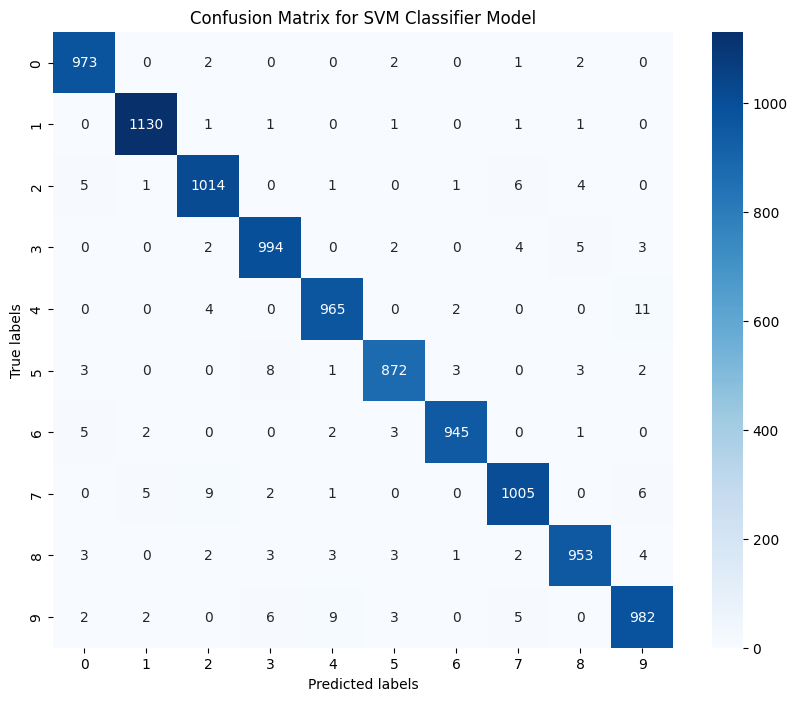

In [6]:
conf_matrix_svc = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_svc , annot = True , fmt = 'd' , cmap = 'Blues')
plt.title("Confusion Matrix for SVM Classifier Model")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

SAVE SVC MODEL

In [7]:
joblib.dump(svm , "SVC_CLASSIFIER_MODEL.pkl")

['SVC_CLASSIFIER_MODEL.pkl']

TRAINING FOR ANN 

In [8]:
ANN_MODEL=Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(512 , activation='relu'),
    layers.Dense(256 , activation='relu'),
    layers.Dense(128 , activation='relu'),
    layers.Dense(10, activation="softmax")
])

ANN_MODEL.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [9]:
ANN_MODEL.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = ANN_MODEL.fit(
    x_train , 
    y_train , 
    epochs = 20 , 
    batch_size = 1024,
    validation_split = 0.2,
    verbose =2
)

Epoch 1/20
47/47 - 1s - 29ms/step - accuracy: 0.8436 - loss: 0.5629 - val_accuracy: 0.9357 - val_loss: 0.2198
Epoch 2/20
47/47 - 0s - 10ms/step - accuracy: 0.9460 - loss: 0.1826 - val_accuracy: 0.9592 - val_loss: 0.1430
Epoch 3/20
47/47 - 0s - 10ms/step - accuracy: 0.9652 - loss: 0.1220 - val_accuracy: 0.9632 - val_loss: 0.1279
Epoch 4/20
47/47 - 0s - 10ms/step - accuracy: 0.9746 - loss: 0.0886 - val_accuracy: 0.9703 - val_loss: 0.1006
Epoch 5/20
47/47 - 0s - 10ms/step - accuracy: 0.9813 - loss: 0.0659 - val_accuracy: 0.9678 - val_loss: 0.1066
Epoch 6/20
47/47 - 0s - 10ms/step - accuracy: 0.9857 - loss: 0.0495 - val_accuracy: 0.9741 - val_loss: 0.0881
Epoch 7/20
47/47 - 0s - 10ms/step - accuracy: 0.9905 - loss: 0.0359 - val_accuracy: 0.9755 - val_loss: 0.0842
Epoch 8/20
47/47 - 0s - 10ms/step - accuracy: 0.9924 - loss: 0.0276 - val_accuracy: 0.9765 - val_loss: 0.0852
Epoch 9/20
47/47 - 0s - 10ms/step - accuracy: 0.9951 - loss: 0.0199 - val_accuracy: 0.9768 - val_loss: 0.0841
Epoch 10/2

In [11]:
test_data_loss , test_data_accuracy = ANN_MODEL.evaluate(x_test , y_test , verbose=2)
print(f"The accuracy for the ANN model is : {test_data_accuracy}")

313/313 - 0s - 1ms/step - accuracy: 0.9820 - loss: 0.0785
The accuracy for the ANN model is : 0.9819999933242798


In [12]:
y_pred_ANN = ANN_MODEL.predict(x_test)
y_pred_ANN = np.argmax(y_pred_ANN , axis=1)
y_pred_ANN

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

Text(95.72222222222221, 0.5, 'True Label')

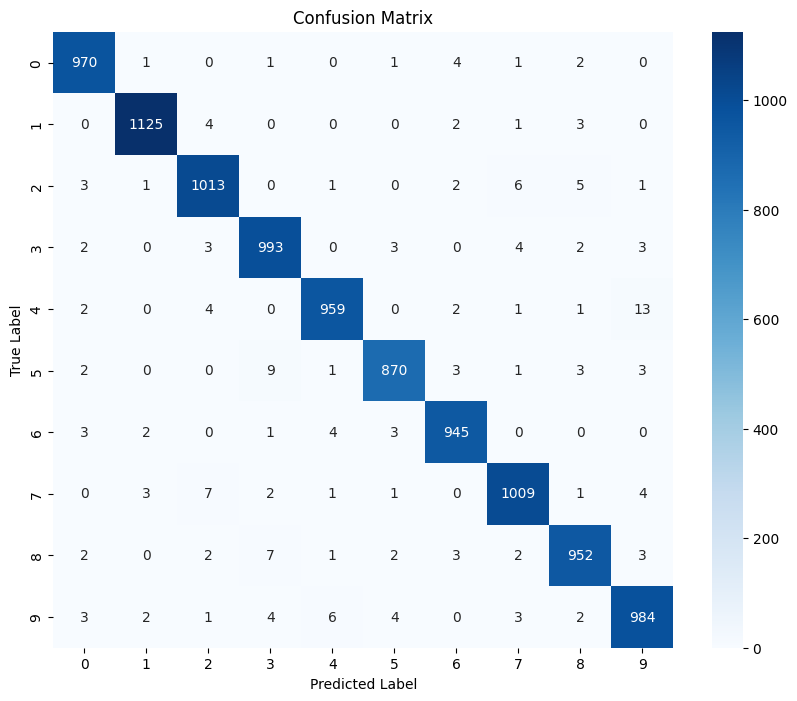

In [13]:
conf_matrix_ANN = confusion_matrix(y_test, y_pred_ANN)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_ANN, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

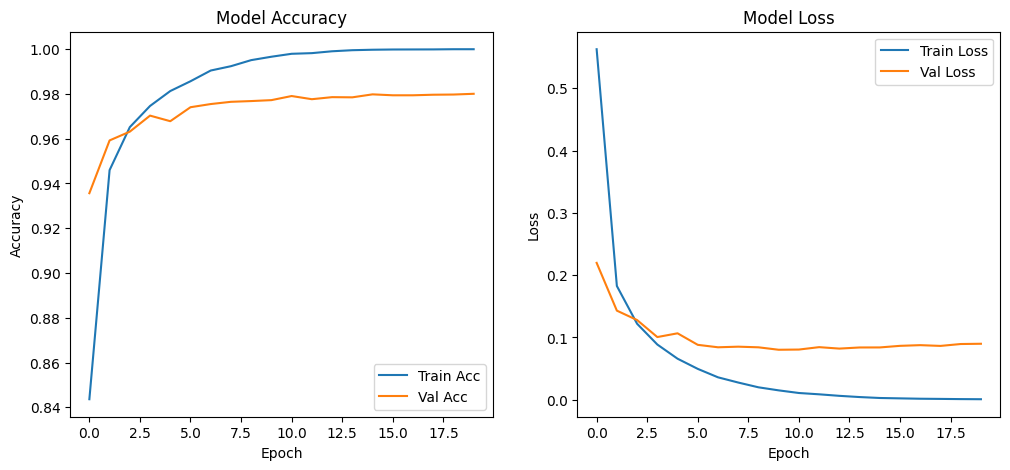

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
ANN_MODEL.save("ANN_MODEL.h5")

CNN MODEL

RESHAPE DATA FOR CNN

In [15]:
x_train_cnn = x_train.reshape(60000,28,28,1)
x_test_cnn = x_test.reshape(10000,28,28,1)


CATEGORIZE Y LABELS

In [16]:
y_train_cnn = to_categorical(y_train , num_classes=10)
y_test_cnn = to_categorical(y_test , num_classes=10)
print(x_train_cnn.shape, y_train_cnn.shape)
print(np.isnan(x_train_cnn).any(), np.isnan(y_train_cnn).any())

(60000, 28, 28, 1) (60000, 10)
False False


In [17]:
CNN_MODEL = Sequential([
    layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu' , input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

CNN_MODEL.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

c:\Users\rocke\anaconda3\envs\AdvancedAI\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
CNN_MODEL.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history_CNN = CNN_MODEL.fit(
    x_train_cnn , 
    y_train_cnn,
    epochs=45,
    batch_size=1024,
    validation_split=0.2,
    callbacks=[EarlyStopping(patience=10)]
)

Epoch 1/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.8487 - loss: 0.5613 - val_accuracy: 0.9336 - val_loss: 0.2304
Epoch 2/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9440 - loss: 0.1945 - val_accuracy: 0.9577 - val_loss: 0.1511
Epoch 3/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9640 - loss: 0.1252 - val_accuracy: 0.9697 - val_loss: 0.1078
Epoch 4/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9742 - loss: 0.0904 - val_accuracy: 0.9767 - val_loss: 0.0858
Epoch 5/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9801 - loss: 0.0700 - val_accuracy: 0.9779 - val_loss: 0.0771
Epoch 6/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9839 - loss: 0.0563 - val_accuracy: 0.9808 - val_loss: 0.0669
Epoch 7/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9861 - loss: 0.0489 - val_accuracy: 0.9808 - val_loss: 0.0619
Epoch 8/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9886 - loss: 0.0407 - val_accuracy: 0.9836 - 

In [20]:
y_pred=CNN_MODEL.predict(x_test_cnn)
y_pred=np.argmax(y_pred,axis=1)
y_test_cnn_final = np.argmax(y_test_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'True Label')

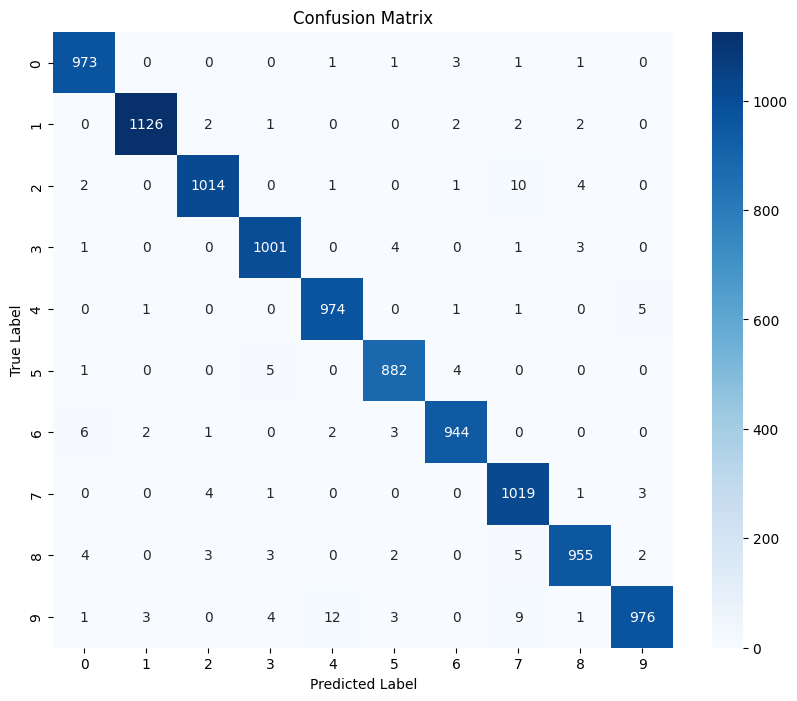

In [21]:
conf_matrix_CNN = confusion_matrix(y_test_cnn_final, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_CNN, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

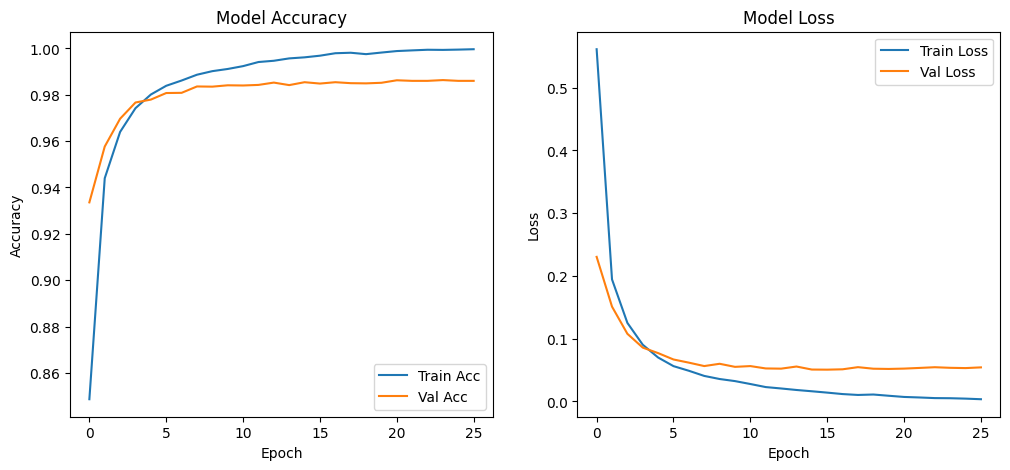

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_CNN.history['accuracy'], label='Train Acc')
plt.plot(history_CNN.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_CNN.history['loss'], label='Train Loss')
plt.plot(history_CNN.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
CNN_MODEL.save("CNN_MODEL.h5")

In [24]:
CNN_MODEL.evaluate(x_test_cnn , y_test_cnn , verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9864 - loss: 0.0454


[0.04535277560353279, 0.9864000082015991]